In [62]:
def radial_prof(rbins, center_file, datapath, DATFILE, EXPFILE, NXBFILE, CHEESEFILE):
    """
    This function plot the radial profile from xmm individual instrument data

    """

    from glob import glob
    import numpy as np
    from astropy.io import fits
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm
    from scipy.ndimage import gaussian_filter
    import os
    from astropy.wcs import WCS
    from astropy.coordinates import SkyCoord

    regf = pd.read_csv(center_file)

    id = os.path.basename(datapath)
    ra = regf[regf['ID']==id]['RA']
    dec = regf[regf['ID']==id]['DEC']

    # convert the coordinates
    dat_widths = fits.getdata(DATFILE).shape
    x,y = np.meshgrid(range(0, dat_widths[0]), range(0, dat_widths[1]))
    wcs = WCS(fits.getheader(DATFILE))
    RA,DEC = wcs.pixel_to_world_values(x,y) 
    
    # dummy coords: RA, DEC, source coords: ra, dec
    distance = SkyCoord(ra=ra,dec=dec,unit='deg').separation(SkyCoord(ra=RA,dec=DEC,unit='deg')).arcmin
    print(distance.shape)
    cts_map = fits.getdata(DATFILE)*fits.getdata(CHEESEFILE)
    bkg_map = fits.getdata(NXBFILE)*fits.getdata(CHEESEFILE)
    exp_map = fits.getdata(EXPFILE)*fits.getdata(CHEESEFILE)
    msk_map = fits.getdata(CHEESEFILE)

    CTS, r_bins = np.histogram(distance.flatten(),weights=cts_map.flatten(),bins=rbins)
    BKG, r_bins = np.histogram(distance.flatten(),weights=bkg_map.flatten(),bins=rbins)

    EXP, r_bins = np.histogram(distance.flatten(),weights=exp_map.flatten(),bins=rbins)

    Npixel, r_bins = np.histogram(distance.flatten(),weights=msk_map.flatten(),bins=rbins)
    
    return CTS, BKG, EXP, Npixel







In [34]:
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy import units as u
from glob import glob
import numpy as np
from astropy.io import fits
# from photutils import CircularAperture, aperture_photometry
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.ndimage import gaussian_filter
import os

ELOs = [500, 2000, 500]
EHIs = [2000, 8000, 8000]

e_idx = 0
rootpath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/alldata/figs/comb_fits_final_img'
datdirs = glob(f'{rootpath}/SDSSTG10094')
regf = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/alldata/fk5_regs/all_centers.csv'


directory = datdirs[0]
DATFILE = f'{directory}/final_img/mos1S001-fovimsky-{ELOs[e_idx]}-{EHIs[e_idx]}.fits'
EXPFILE = f'{directory}/final_img/mos1S001-expimsky-{ELOs[e_idx]}-{EHIs[e_idx]}.fits'
NXBFILE = f'{directory}/final_img/mos1S001-bkgimsky-{ELOs[e_idx]}-{EHIs[e_idx]}.fits'
SHOFILE = f'{directory}/final_img/mos1S001-fovimsky-{ELOs[e_idx]}-{EHIs[e_idx]}.fits'
CHEESEFILE = f'{directory}/final_img/mos1S001-cheeset.fits'

# RA=regf[regf['ID']==os.path.basename(directory)]['RA']
# DEC=regf[regf['ID']==os.path.basename(directory)]['DEC']

In [63]:
CTS, BKG, EXP, Npixel = radial_prof(np.linspace(0, 30, 100), regf, directory, DATFILE, EXPFILE, NXBFILE, CHEESEFILE)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 59731.000833 from DATE-END'. [astropy.wcs.wcs]


(900, 900)


In [22]:
print(CTS)

[]


/var/folders/sy/vxhnb6x11wz6mkt7x_sw_y140000gn/T/ipykernel_79402/3802703914.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.stairs(CTS/EXP,r_bins,label='CTS')
/var/folders/sy/vxhnb6x11wz6mkt7x_sw_y140000gn/T/ipykernel_79402/3802703914.py:4: RuntimeWarning: invalid value encountered in true_divide
  plt.stairs(BKG/EXP,r_bins,label='BKG')
/var/folders/sy/vxhnb6x11wz6mkt7x_sw_y140000gn/T/ipykernel_79402/3802703914.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.stairs(CTS/EXP-BKG/EXP,r_bins,label='NET')
/var/folders/sy/vxhnb6x11wz6mkt7x_sw_y140000gn/T/ipykernel_79402/3802703914.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.stairs(EXP/Npixel/EXP[0]*1e-4,r_bins,label='EXP (arbitrary scale)')
/var/folders/sy/vxhnb6x11wz6mkt7x_sw_y140000gn/T/ipykernel_79402/3802703914.py:10: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(x=np.sqrt(r_bins[:-1]*r_bins[1:]),y=CTS/EXP,yerr=np.sqrt(CTS)/EXP,fmt='none')


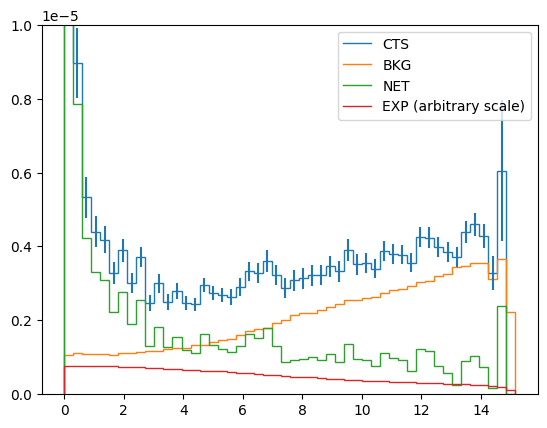

In [65]:
r_bins = np.linspace(0, 30, 100 )

plt.stairs(CTS/EXP,r_bins,label='CTS')
plt.stairs(BKG/EXP,r_bins,label='BKG')
plt.stairs(CTS/EXP-BKG/EXP,r_bins,label='NET')

plt.stairs(EXP/Npixel/EXP[0]*1e-4,r_bins,label='EXP (arbitrary scale)')


plt.errorbar(x=np.sqrt(r_bins[:-1]*r_bins[1:]),y=CTS/EXP,yerr=np.sqrt(CTS)/EXP,fmt='none')

plt.ylim([0,1e-5])
plt.legend()